In [1]:
#Read Dataset:
import pandas as pd
A = pd.read_csv("C:/Users/Admin/Downloads/digitsnpixels.csv")

In [2]:
A.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
A.shape

(42000, 785)

In [4]:
#Visualize 1 image by converting into 28*28

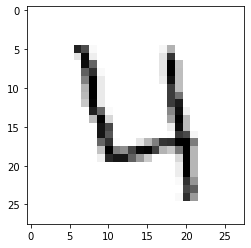

In [5]:
import matplotlib.pyplot as plt
X = A.drop("label",axis=1).values
plt.imshow(X[3:4].reshape(28,28),cmap=plt.cm.binary)

In [6]:
X[3:4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 220, 179,   6,   0,   0,   0,   0,   0,   0,   0,
          0,   9,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  28, 247,  17,   0

In [7]:
#Define X and Y in array format
#Convert Y into cactegorical data(OHE)

In [8]:
Y = A.label.values

In [9]:
Y_cat = pd.get_dummies(Y).values

In [10]:
import tensorflow as tf

In [12]:
X_scaled = X/255
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
Y_cat

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [14]:
#Train and test splits

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y_cat,test_size=0.2,random_state=21)

In [16]:
xtrain.shape

(33600, 784)

In [17]:
xtest.shape

(8400, 784)

In [18]:
xtrain = xtrain.reshape(33600,28,28,1)
xtest = xtest.reshape(8400,28,28,1)

In [19]:
xtrain.shape

(33600, 28, 28, 1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,BatchNormalization,Flatten

In [21]:
nn = Sequential()

nn.add(Convolution2D(filters = 16,kernel_size = (3,3),activation="relu",input_shape=(28, 28, 1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Flatten())

nn.add(Dense(120,activation="relu"))
nn.add(Dense(10,activation="softmax"))

In [22]:
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [23]:
nn.fit(xtrain,ytrain,epochs=3,batch_size=64)

Epoch 1/3
525/525 [==============================] - 15s 26ms/step - loss: 0.1973 - accuracy: 0.9388
Epoch 2/3
525/525 [==============================] - 14s 26ms/step - loss: 0.0653 - accuracy: 0.9791
Epoch 3/3
525/525 [==============================] - 12s 23ms/step - loss: 0.0421 - accuracy: 0.9866


In [24]:
pred_prob = nn.predict(xtest)
from numpy import argmax
pred = argmax(pred_prob,axis=1)
ytest = argmax(ytest,axis=1)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.9804761904761905